In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Carga de datos

In [2]:
titanic=sns.load_dataset('titanic')

## Verificacion inicial

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

observamos que tenemos 177 null en age y 688 en deck

In [5]:
titanic[titanic['age'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
17,1,2,male,NaN,0,0,13.0000,S,Second,man,True,NaN,Southampton,yes,True
19,1,3,female,NaN,0,0,7.2250,C,Third,woman,False,NaN,Cherbourg,yes,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
868,0,3,male,NaN,0,0,9.5000,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.duplicated().sum()

np.int64(107)

In [7]:
titanic[titanic.duplicated(keep=False)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
titanic.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(titanic['survived'].unique())
#print(titanic['fare'].unique())
print('pclass',titanic['pclass'].unique())
print('who',titanic['who'].unique())
print('adult_male',titanic['adult_male'].unique())
print('deck',titanic['deck'].unique())
print('alone',titanic['alone'].unique())
print('embarked',titanic['embarked'].unique())


[0 1]
pclass [3 1 2]
who ['man' 'woman' 'child']
adult_male [ True False]
deck [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']
alone [False  True]
embarked ['S' 'C' 'Q' nan]


- observamos que hay columnas que tienen la misma informacion 
    - 'survived' y 'alive' son iguales , nos indican si es mujer u hombre
    - 'pclass' y 'class' son iguales, nos indican la clase del pasajero 
      

- eliminamos class, alive, embark_town

In [10]:
titanic.drop(['class', 'alive', 'embark_town'], axis=1, inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,False
1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,False
2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,True
3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,False
4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,man,True,NaN,True
887,1,1,female,19.0,0,0,30.0000,S,woman,False,B,True
888,0,3,female,NaN,1,2,23.4500,S,woman,False,NaN,False
889,1,1,male,26.0,0,0,30.0000,C,man,True,C,True


In [12]:
titanic.to_csv("titanic_limpio.csv",encoding="utf-8")

df_2=pd.read_csv('titanic_limpio.csv',index_col=False)
df_2

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,0,0,3,male,22.0,1,0,7.2500,S,man,True,NaN,False
1,1,1,1,female,38.0,1,0,71.2833,C,woman,False,C,False
2,2,1,3,female,26.0,0,0,7.9250,S,woman,False,NaN,True
3,3,1,1,female,35.0,1,0,53.1000,S,woman,False,C,False
4,4,0,3,male,35.0,0,0,8.0500,S,man,True,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,man,True,NaN,True
887,887,1,1,female,19.0,0,0,30.0000,S,woman,False,B,True
888,888,0,3,female,NaN,1,2,23.4500,S,woman,False,NaN,False
889,889,1,1,male,26.0,0,0,30.0000,C,man,True,C,True


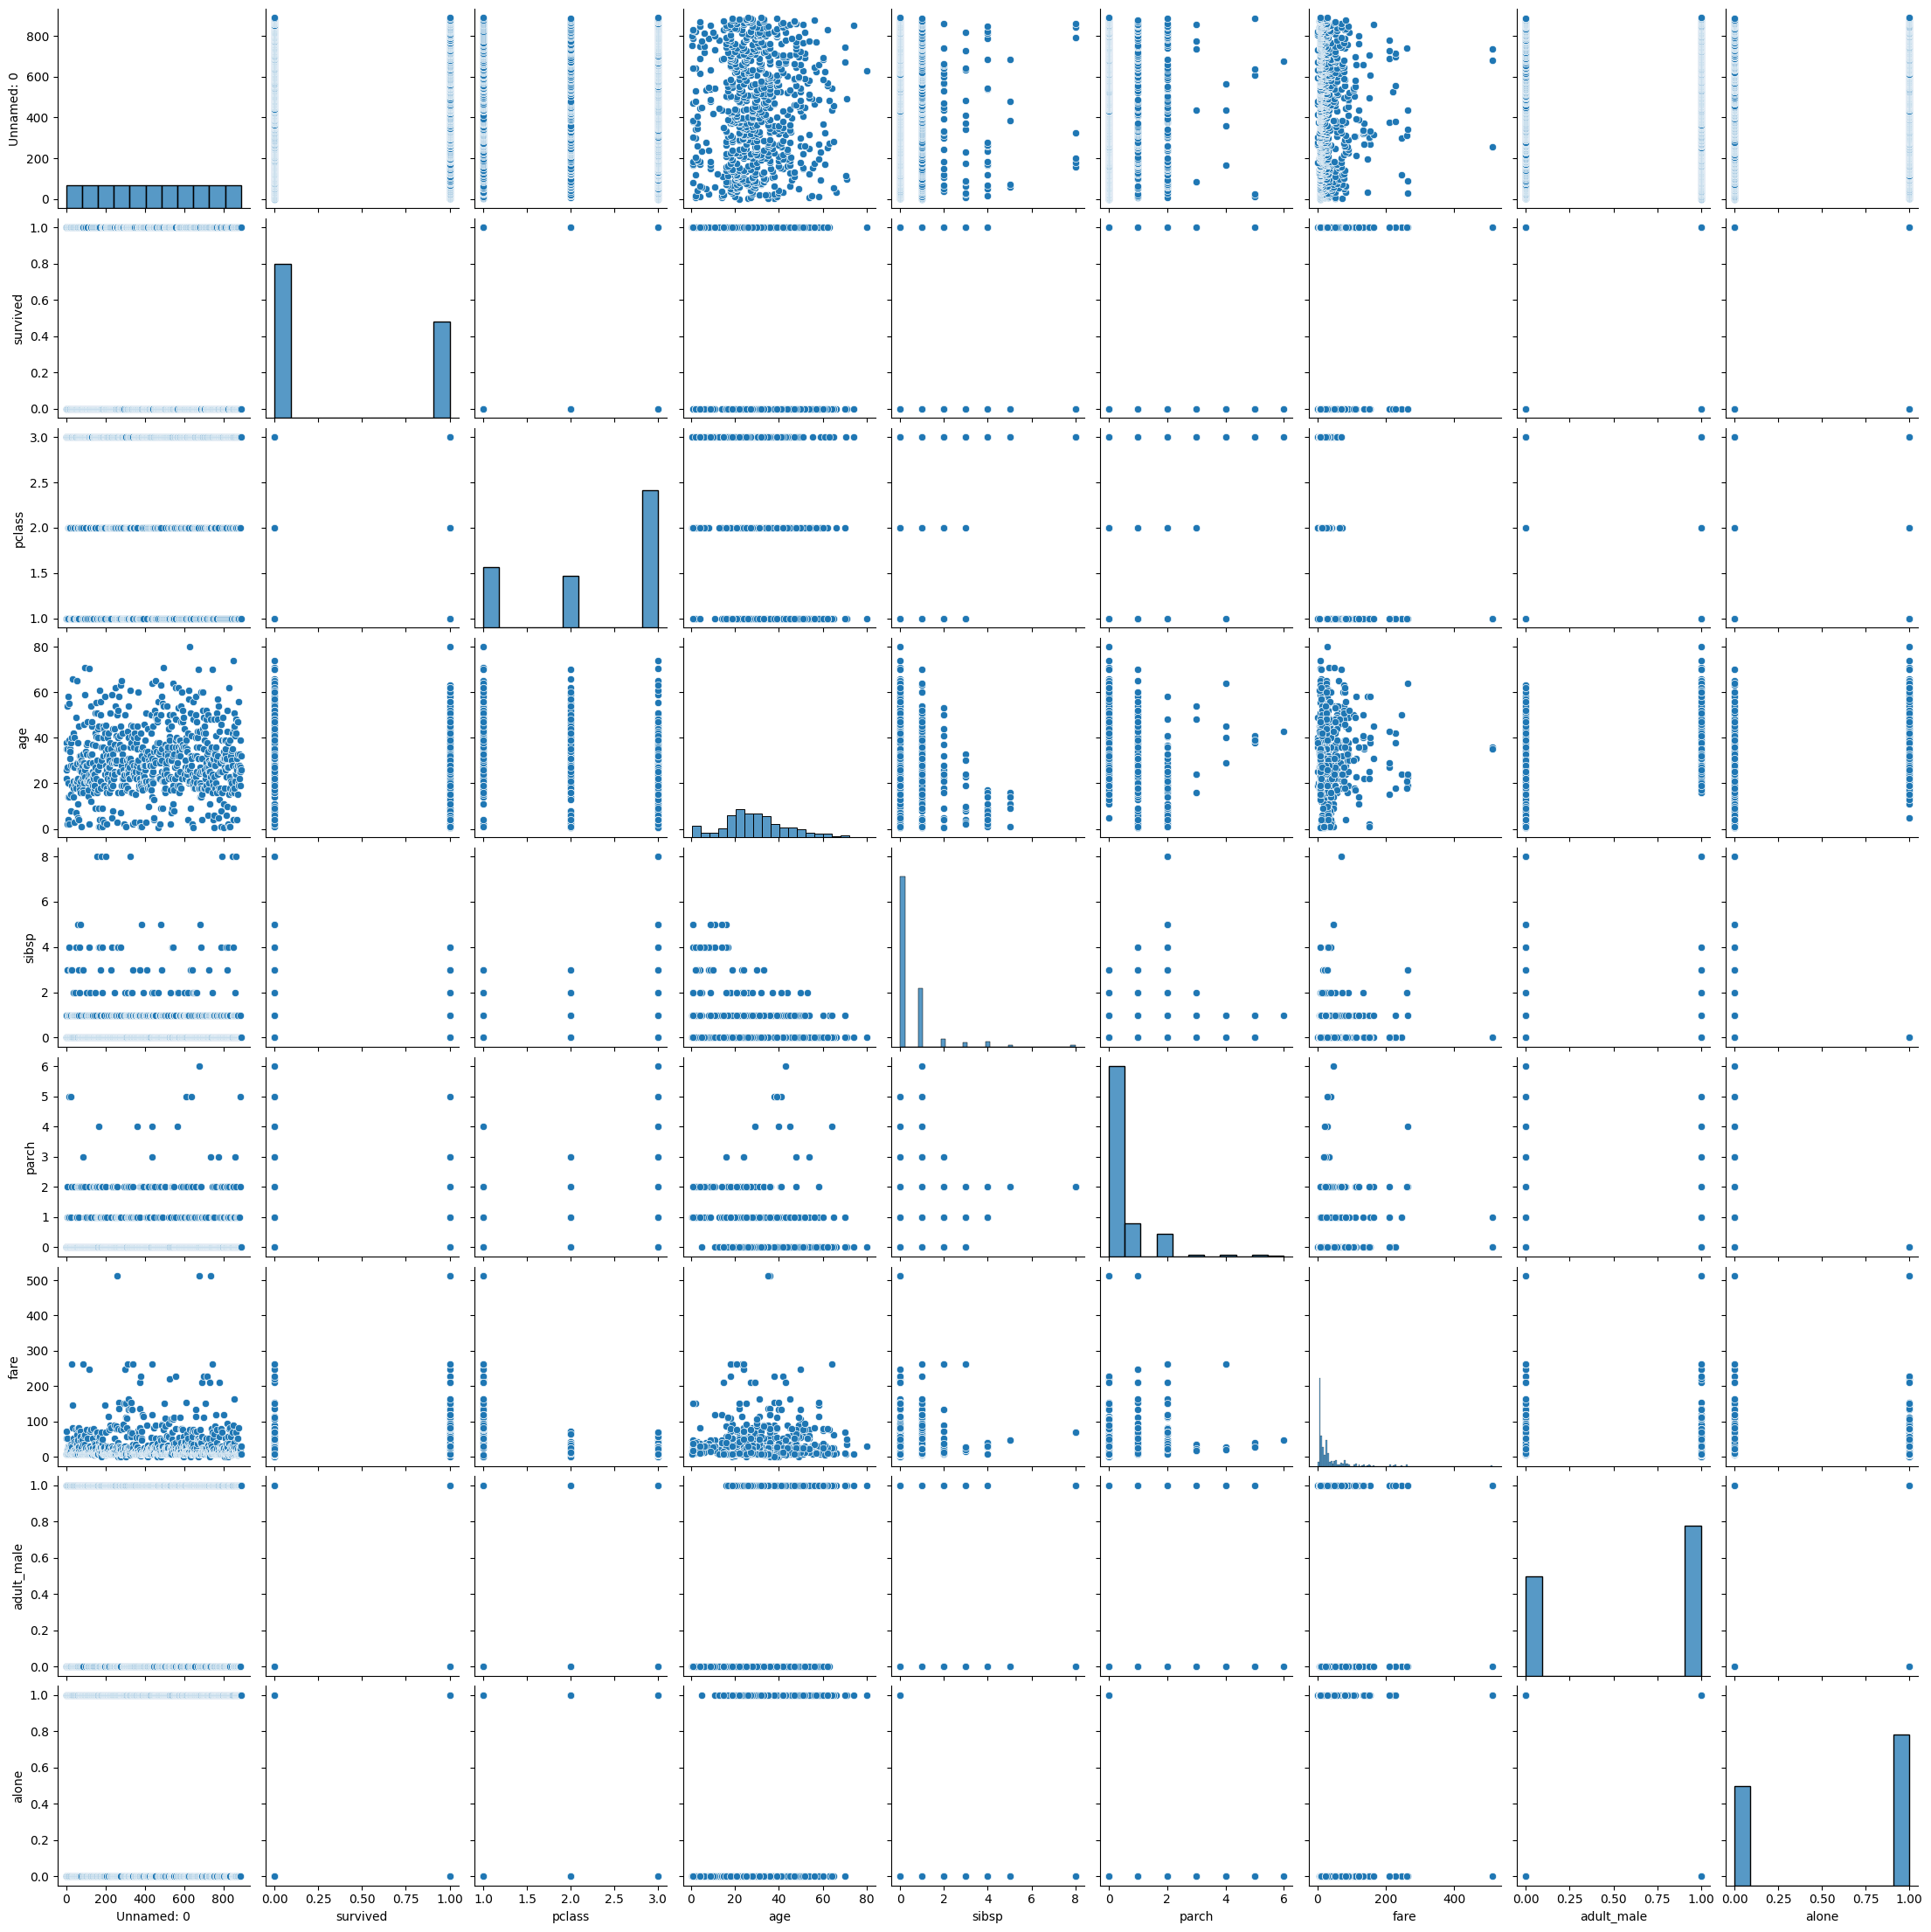

In [16]:
sns.pairplot(df_2);

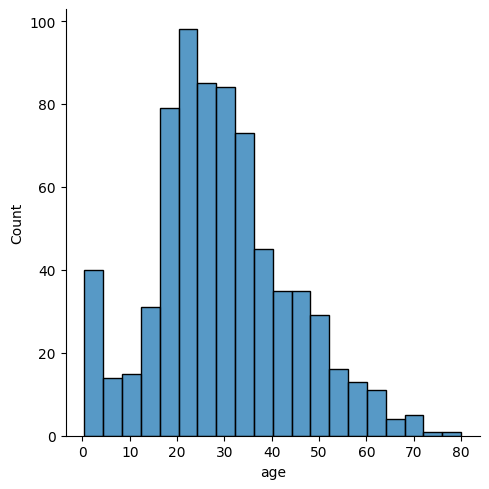

In [14]:
sns.displot(df_2['age']);

In [13]:
df_2.corr(numeric_only=True)

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare,adult_male,alone
Unnamed: 0,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.041010,0.057462
survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,0.041010,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,0.057462,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


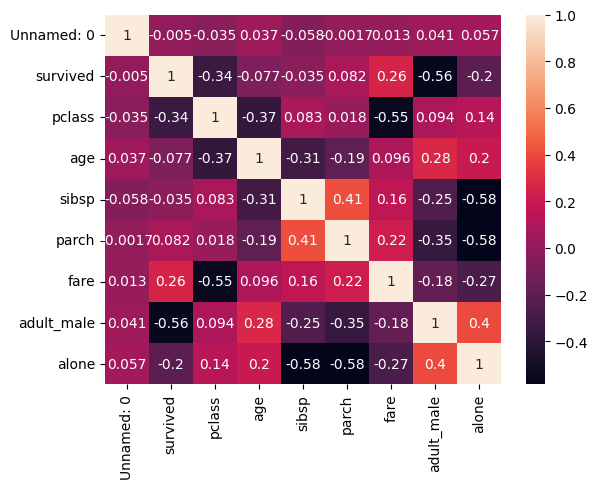

In [15]:
sns.heatmap(df_2.corr(numeric_only=True), annot=True);

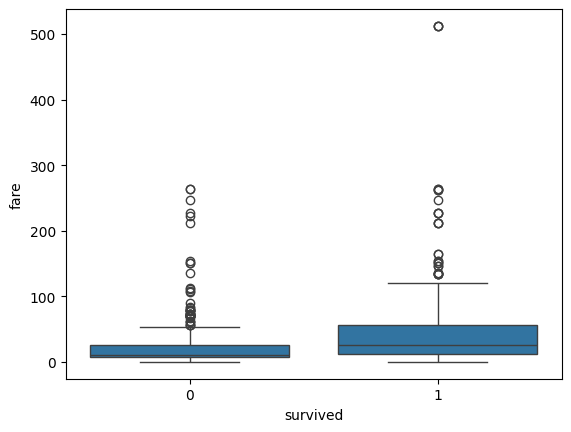

In [17]:
sns.boxplot(x= df_2['survived'], y= df_2['fare']);

In [20]:
df_2.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'who', 'adult_male', 'deck', 'alone'],
      dtype='object')

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

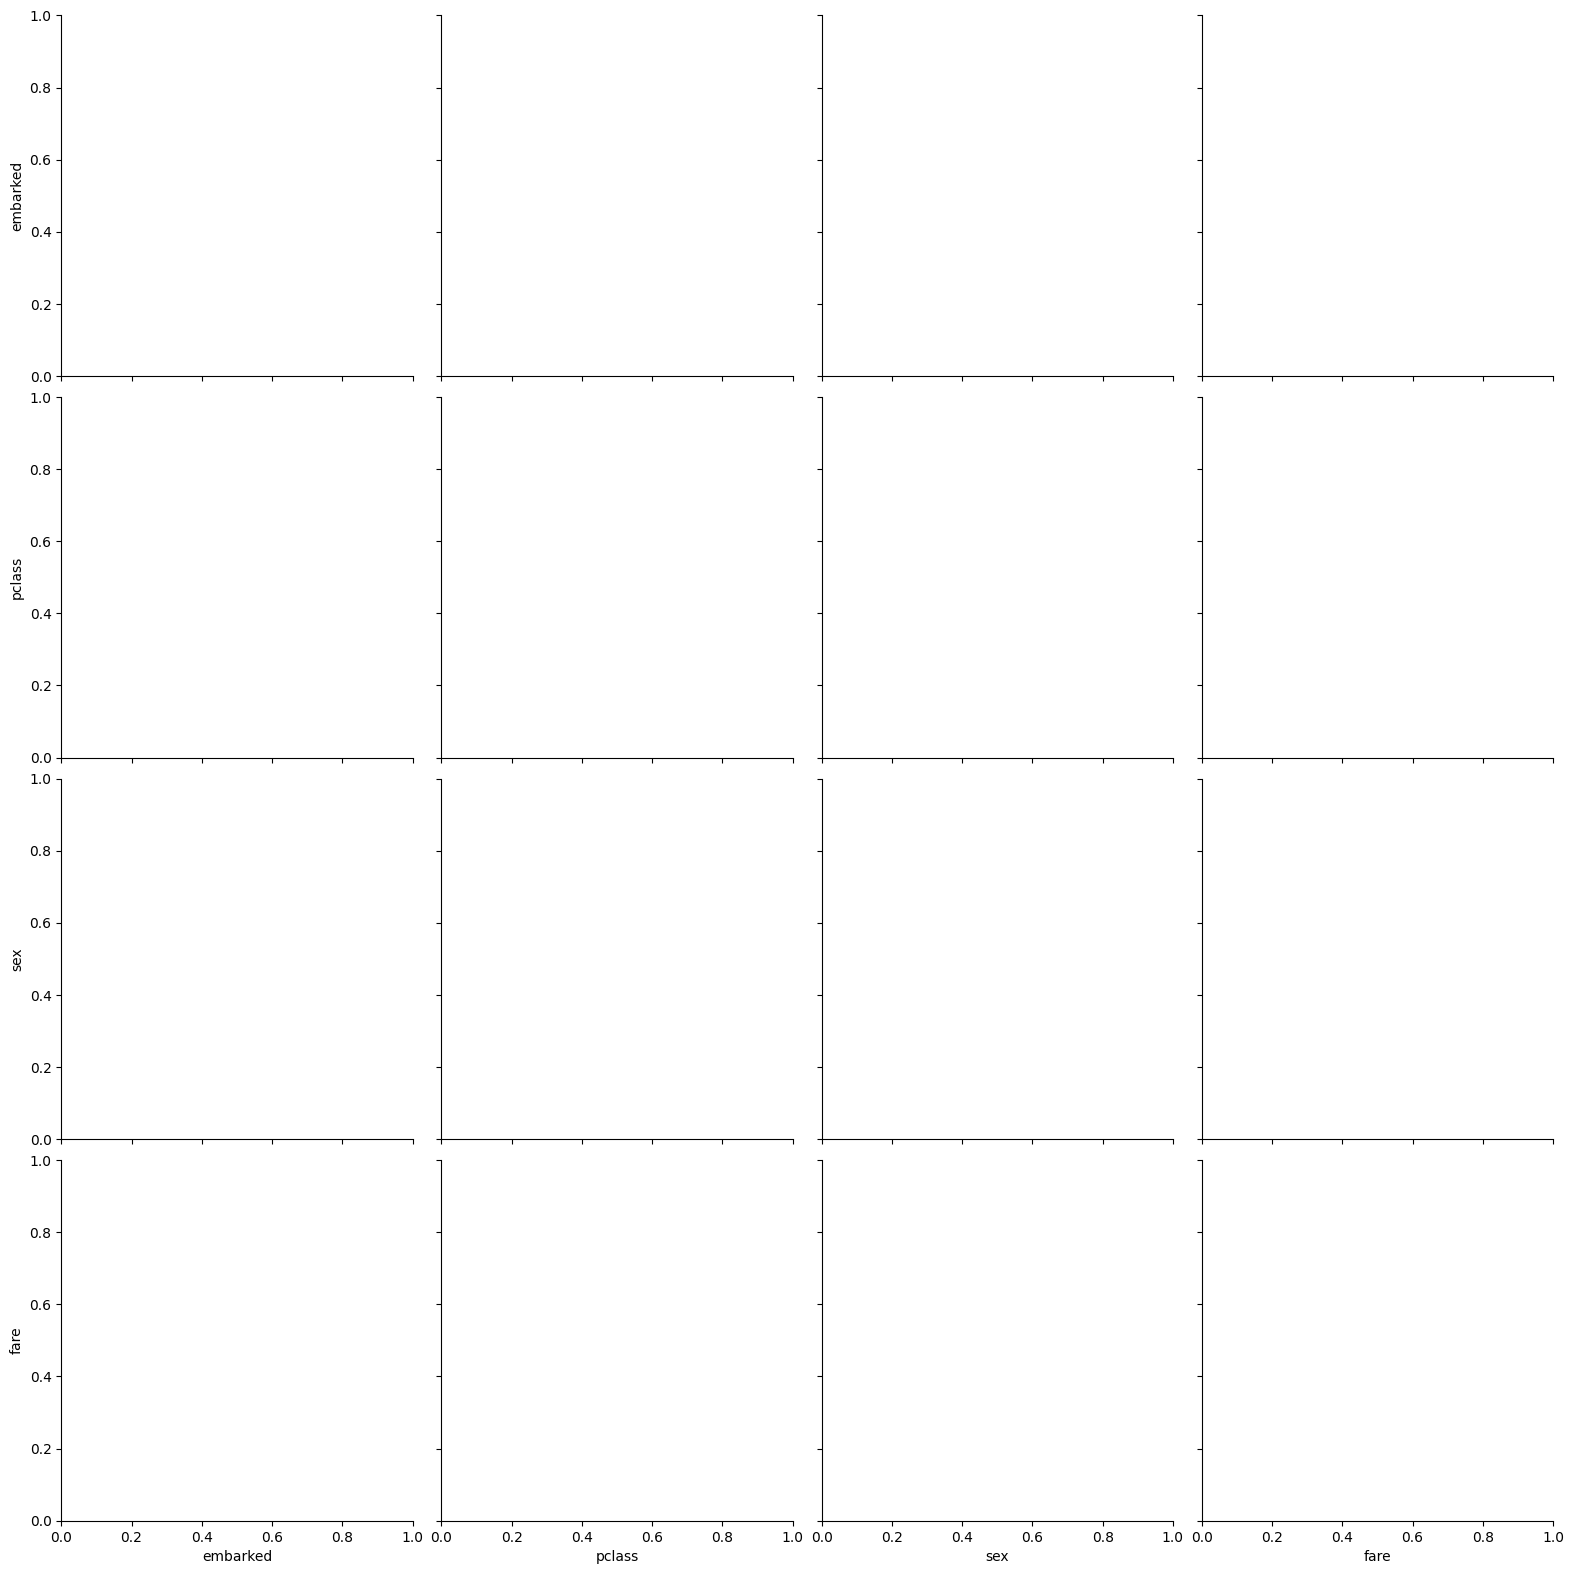

In [22]:
sns.pairplot(df_2.dropna(),
            hue='survived',
            height=4,
            vars=["embarked", "pclass","sex","fare"],
            kind='reg');